In [1]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

from Environment.env_v8 import *
from Functions.visualization_functions import *

In [2]:
# Configuration of the network
with open('./Config/network_config_v1.json') as file:
    network_config = file.read()

In [3]:
EP_LENGTH = 365

stockout_cost = 2000
order_cost = 10
item_cost = 1
stock_cost = 0.1
item_prize = 2

env = SS_Mngmt_Env(
    network_config=network_config,
    EP_LENGTH=EP_LENGTH,
    render_mode="human",
    model_type="PPO",
    stockout_cost=stockout_cost,
    order_cost=order_cost,
    item_cost=item_cost,
    stock_cost=stock_cost * item_cost,
    item_prize=item_prize * item_cost,
    order_quantities=[0, 25, 50],
    demand_mean=8,
    demand_std=2,
    demand_noise=0,
    demand_noise_std=2,
)

check_env(env, warn=True)

/Users/jonasrenfer/miniconda3/envs/rl-scm/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation planned_demand has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [4]:
log_path = os.path.join('Training', 'Test', 'Logs')
model_path = os.path.join('Training', 'Test', 'Models', 'PPO')

In [7]:
dummy_env = DummyVecEnv([lambda: env])

model = PPO("MultiInputPolicy", 
            dummy_env,
            verbose=0,
            tensorboard_log=log_path)

In [8]:
model.learn(total_timesteps=100_000)

In [9]:
evaluate_policy(model, env, n_eval_episodes=1, render=True, return_episode_rewards=True)

/Users/jonasrenfer/miniconda3/envs/rl-scm/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(



Episode Information
Episode Length: 1
Stock Level (Previous Timestep): [30.0, 30.0, 30.0]
Stock Level: [24. 27. 24.]
Planned Demand: [5. 3. 6.]
Actual Demand: [6. 3. 6.]
Action: [0, 0, 50]
Order: [0 0 0]
Reward: 9.0
Last element Reward: -37.50000047683716

Backlog:
[False, False, False]
{'A': deque([]), 'B': deque([]), 'C': deque([])}

Order Queue:
{   'A': deque([0, 0, 0, 0, 0], maxlen=5),
    'B': deque([0, 0, 0, 0, 0], maxlen=5),
    'C': deque([0, 0, 0, 0, 50], maxlen=5)}

Stockout Cost:  2000
Lengths - stock: 2, action: 2, demand: 2, delivery: 2, reward: 2, backlog: 2

Episode Information
Episode Length: 2
Stock Level (Previous Timestep): [24.0, 27.0, 24.0]
Stock Level: [24. 27. 24.]
Planned Demand: [0. 0. 0.]
Actual Demand: [0. 0. 0.]
Action: [0, 0, 50]
Order: [0 0 0]
Reward: -37.50000047683716
Last element Reward: -67.50000047683716

Backlog:
[False, False, False]
{'A': deque([]), 'B': deque([]), 'C': deque([])}

Order Queue:
{   'A': deque([0, 0, 0, 0, 0], maxlen=5),
    'B': 

([-1350171.0001850128], [365])

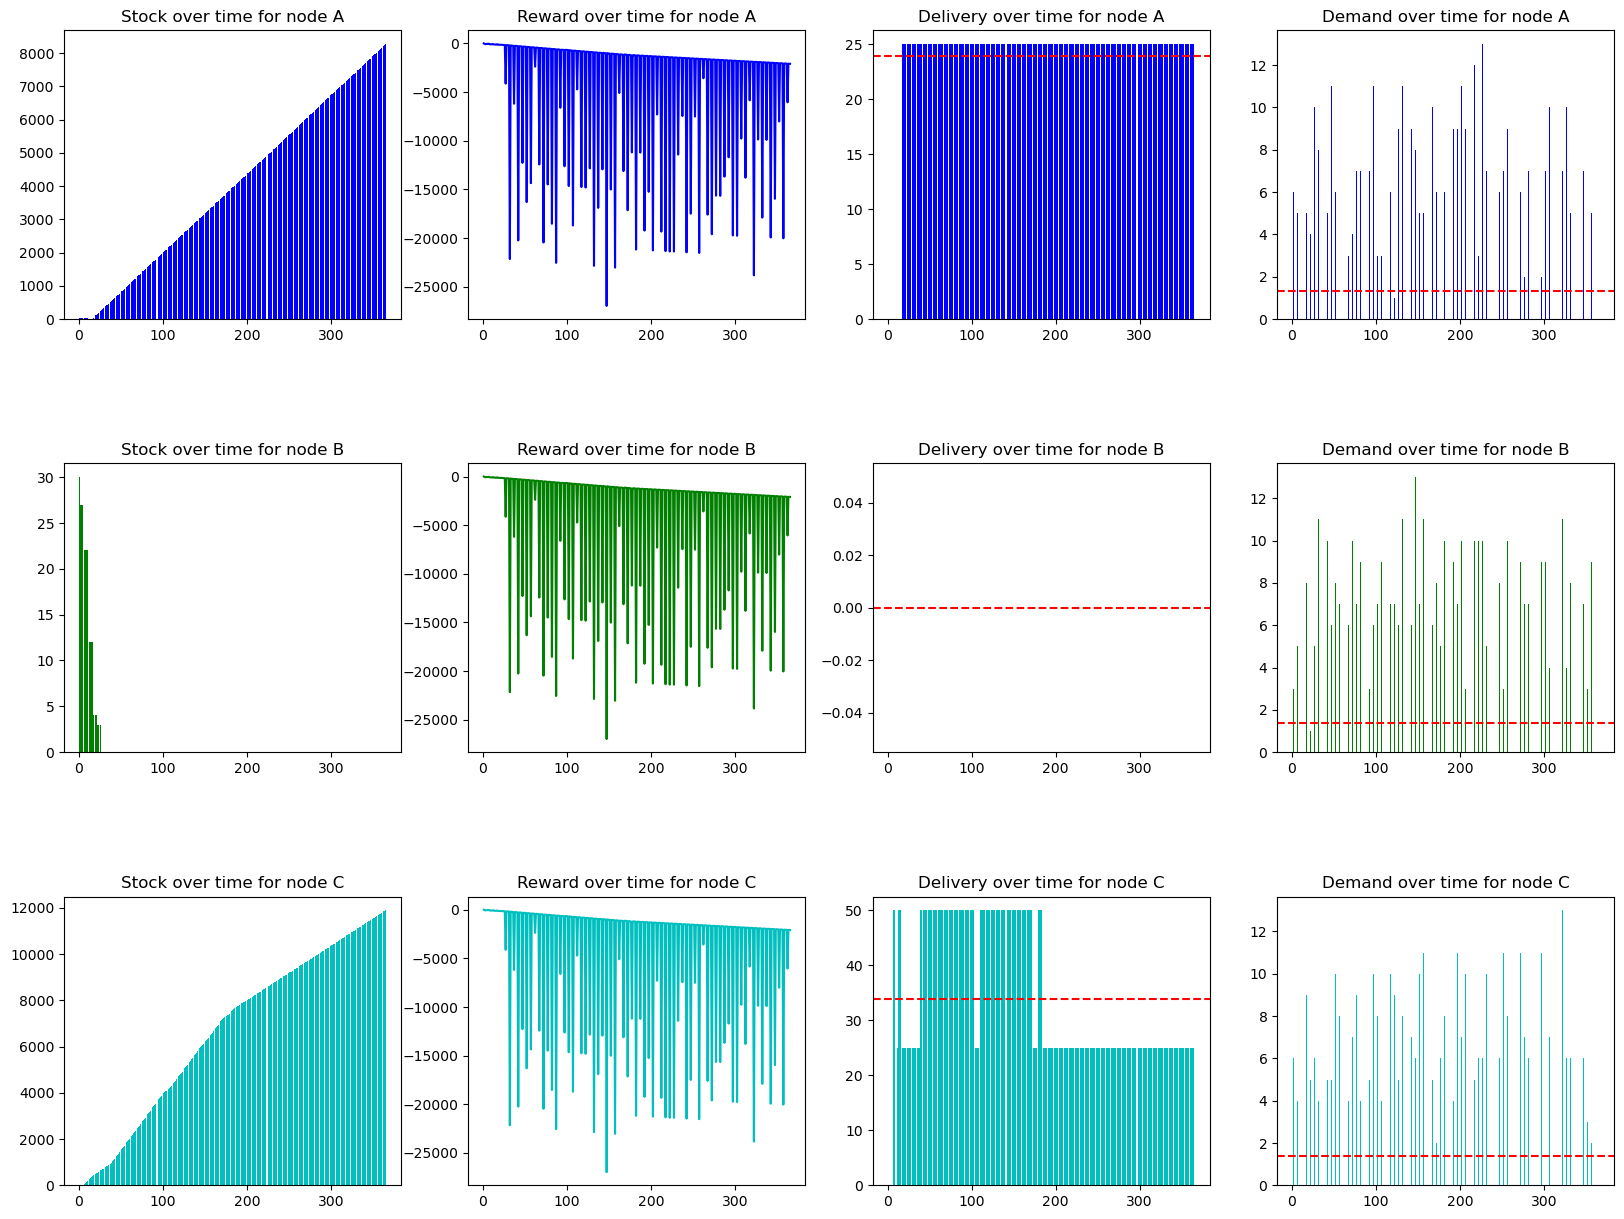

In [10]:
file = './Data/2024-11-24_21_last_environment_data_PPO.csv'
df = pd.read_csv(file)

plot_data(df)